# Paper figures

### Author: M.Ravasi

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import xarray as xr
from scipy.signal import filtfilt
from segyshot import SegyShot

plt.style.use('default')  # seaborn-whitegrid, ggplot, bmh

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('text', usetex=True)

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title
plt.rc('font', weight='bold')  # fontsize of the figure title

## Models

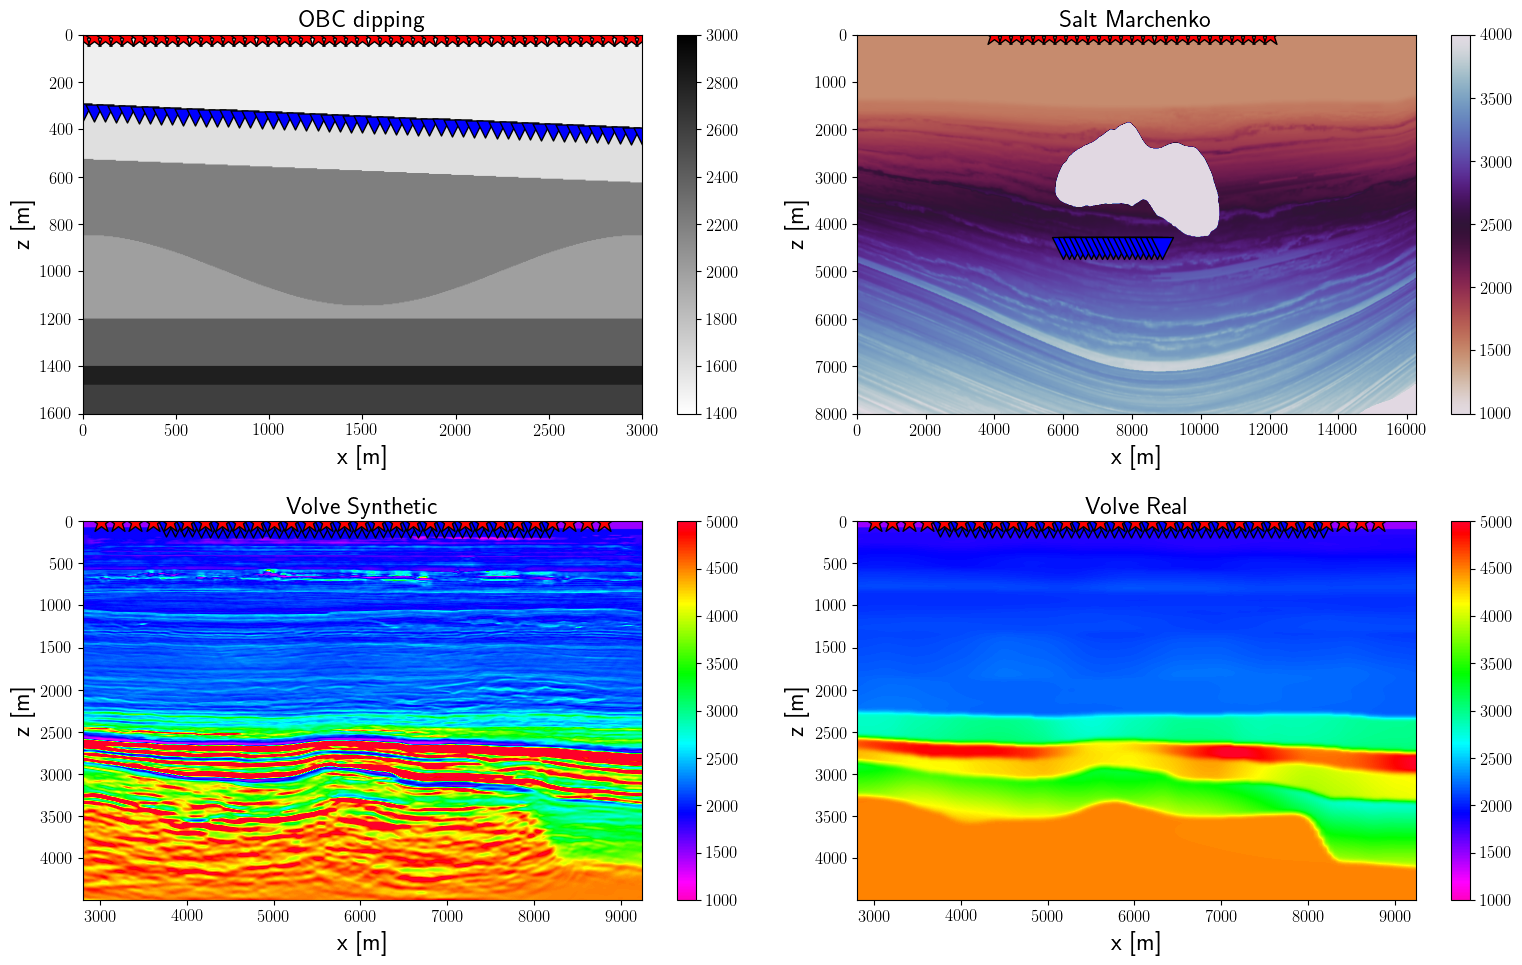

In [2]:
# OBC dipping #
###############
inputdata = np.load('Data/input_dipping_recsolid.npz')

# Receivers
r_obc = inputdata['r']
r_obc = r_obc[:, 201:]

# Sources
s_obc = inputdata['s']

# Model
rho_obc = inputdata['rho']
vel_obc = inputdata['vel']

x_obc, z_obc = inputdata['x'], inputdata['z']


# Salt #
########
model_salt = xr.open_dataset('/home/ravasim/Documents/Data/DirtySalt_Utrecht/Roperator_data/data/model_salt.nc')
vel_salt = model_salt["VP"].data
ds_salt = xr.open_dataset('/home/ravasim/Documents/Data/DirtySalt_Utrecht/Roperator_data/data/S_mko.nc')

# Receivers
r_salt = ds_salt.coords['x_vs'].values

# Sources
s_salt = ds_salt.coords['x_r'].values

x_salt, z_salt = model_salt["x"], model_salt["y"]


# Volve #
#########
inputvolve = np.load('/home/ravasim/Documents/2021/Projects/VolveSynthetic/Data/Velocity/Velocities.npz')
vel_volve = inputvolve["v"]
velback_volve = inputvolve["vback"]

x_volve = inputvolve["x"]
z_volve = inputvolve["z"]
s_volve = inputvolve["srcs"].T
r_volve = inputvolve["recs"].T


cmap='twilight_r'
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
im = axs[0][0].imshow(vel_obc, cmap='gray_r', vmin=1400, vmax=3000,
                      extent=(x_obc[0], x_obc[-1], z_obc[-1], z_obc[0]))
axs[0][0].scatter(r_obc[0, ::4], r_obc[1, ::4], marker='v', s=150, c='b', edgecolors='k')
axs[0][0].scatter(s_obc[0, ::4], s_obc[1, ::4], marker='*', s=250, c='r', edgecolors='k')
axs[0][0].axis('tight')
axs[0][0].set_xlabel('x [m]')
axs[0][0].set_ylabel('z [m]')
axs[0][0].set_title('OBC dipping')
axs[0][0].set_xlim(x_obc[0], x_obc[-1])
axs[0][0].set_ylim(z_obc[-1], z_obc[0])
plt.colorbar(im, ax=axs[0][0]);
axs[0][0].axis('tight');

im = axs[0][1].imshow(vel_salt, cmap=cmap, vmin=1000, vmax=4000,
                      extent=(x_salt[0], x_salt[-1], z_salt[-1], z_salt[0]))
axs[0][1].scatter(s_salt[::8], 0*np.ones_like(s_salt)[::8], marker='*', s=250, c='r', edgecolors='k')
axs[0][1].scatter(r_salt[::8], 4500*np.ones_like(r_salt)[::8], marker='v', s=250, c='b', edgecolors='k')
axs[0][1].axis('tight')
axs[0][1].set_xlabel('x [m]')
axs[0][1].set_ylabel('z [m]')
axs[0][1].set_title('Salt Marchenko')
axs[0][1].set_xlim(x_salt[0], x_salt[-1])
axs[0][1].set_ylim(z_salt[-1], z_salt[0])
plt.colorbar(im, ax=axs[0][1]);
axs[0][1].axis('tight');

im = axs[1][0].imshow(vel_volve, cmap='gist_rainbow_r', vmin=1000, vmax=5000,
                      extent=(x_volve[0], x_volve[-1], z_volve[-1], z_volve[0]))
axs[1][0].scatter(r_volve[0, ::4], r_volve[1, ::4], marker='v', s=150, c='b', edgecolors='k')
axs[1][0].scatter(s_volve[0, ::4], s_volve[1, ::4], marker='*', s=250, c='r', edgecolors='k')
axs[1][0].axis('tight')
axs[1][0].set_xlabel('x [m]')
axs[1][0].set_ylabel('z [m]')
axs[1][0].set_title('Volve Synthetic')
axs[1][0].set_xlim(x_volve[0], x_volve[-1])
axs[1][0].set_ylim(z_volve[-1], z_volve[0])
plt.colorbar(im, ax=axs[1][0]);
axs[1][0].axis('tight');

im = axs[1][1].imshow(velback_volve, cmap='gist_rainbow_r', vmin=1000, vmax=5000,
                      extent=(x_volve[0], x_volve[-1], z_volve[-1], z_volve[0]))
axs[1][1].scatter(r_volve[0, ::4], r_volve[1, ::4], marker='v', s=150, c='b', edgecolors='k')
axs[1][1].scatter(s_volve[0, ::4], s_volve[1, ::4], marker='*', s=250, c='r', edgecolors='k')
axs[1][1].axis('tight')
axs[1][1].set_xlabel('x [m]')
axs[1][1].set_ylabel('z [m]')
axs[1][1].set_title('Volve Real')
axs[1][1].set_xlim(x_volve[0], x_volve[-1])
axs[1][1].set_ylim(z_volve[-1], z_volve[0])
plt.colorbar(im, ax=axs[1][1]);
axs[1][1].axis('tight');
fig.tight_layout()
plt.savefig('Figs/Paper/Models.eps', dpi=150, bbox_inches='tight')

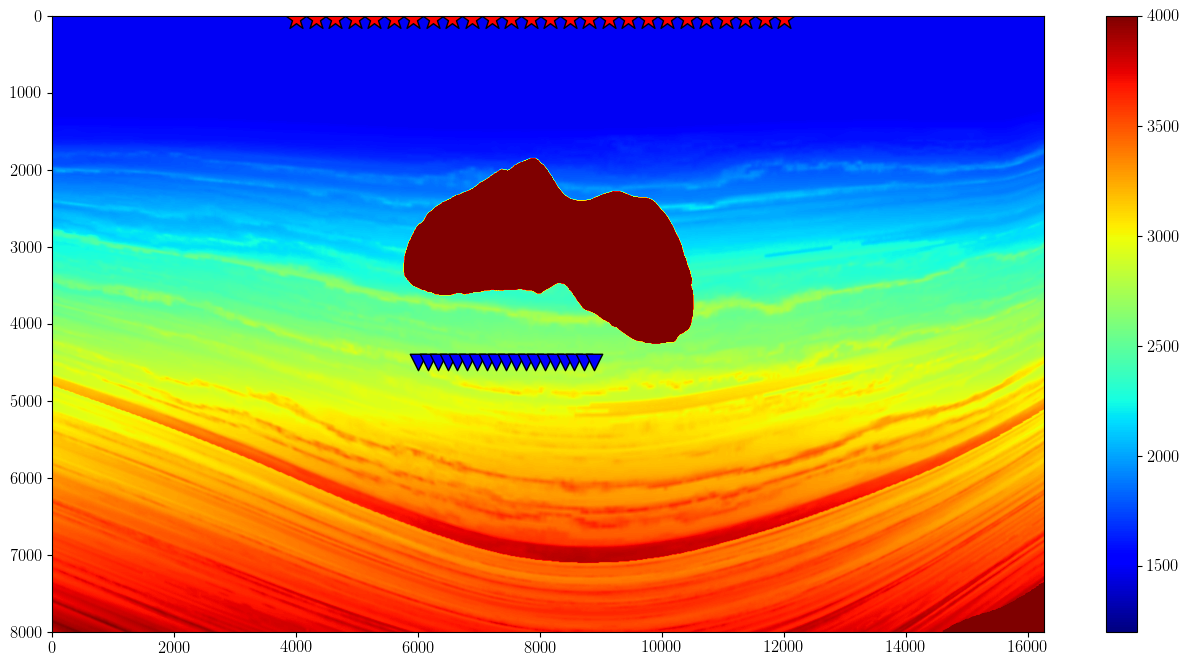

In [3]:
cmap='jet'
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
im = ax.imshow(vel_salt, cmap=cmap, vmin=1200, vmax=4000,
                      extent=(x_salt[0], x_salt[-1], z_salt[-1], z_salt[0]))
ax.scatter(s_salt[::8], 50*np.ones_like(s_salt)[::8], marker='*', s=250, c='r', edgecolors='k')
ax.scatter(r_salt[::8], 4500*np.ones_like(r_salt)[::8], marker='v', s=140, c='b', edgecolors='k')
ax.axis('tight');
plt.colorbar(im)
plt.savefig('Figs/Paper/Model_salt_krow.eps', dpi=150)

## Example 1: dipping OBC

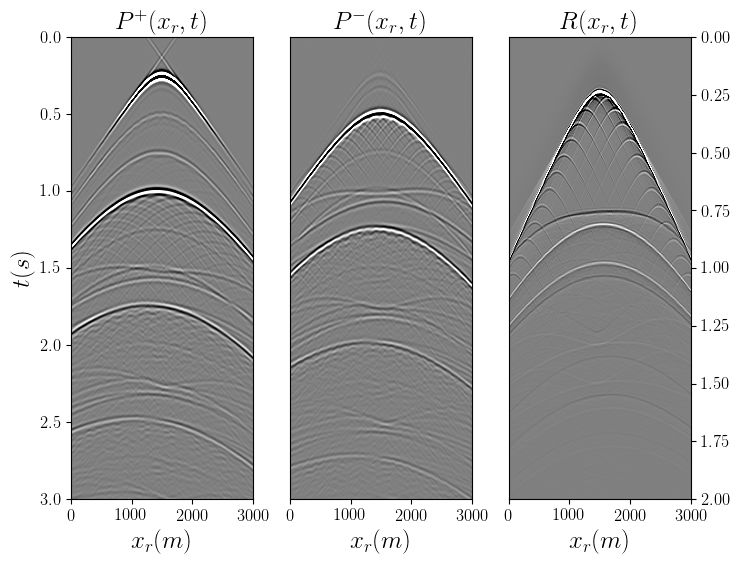

In [48]:
f = np.load('Data/updown_dipping_belowseabed_src_ana.npz')
f1 = np.load('Data/input_dipping_noseabed_recsolid.npz')

# Data
pup = f['pup']
pdown = f['pdown']
R = -f1['vz_noseabed']
t = f1['t']

clip = 0.1
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
axs[0].imshow(pdown[s_obc.shape[1]//2], cmap='gray', 
              vmin=-clip*np.abs(pdown).max(), vmax=clip*np.abs(pdown).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[0].set_title(r'$P^+(x_r, t)$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[0].set_ylim(3., 0)
axs[1].imshow(pup[s_obc.shape[1]//2], cmap='gray', 
              vmin=-clip*np.abs(pdown).max(), vmax=clip*np.abs(pdown).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[1].set_title(r'$P^-(x_r, t)$')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[1].set_ylim(3., 0)
axs[2].imshow(R, cmap='gray', 
              vmin=-clip*np.abs(R).max(), vmax=clip*np.abs(R).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[2].set_title(r'$R(x_r, t)$')
axs[2].yaxis.tick_right()
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[2].set_ylim(2., 0)
#plt.tight_layout()
plt.savefig('Figs/Paper/OBCdipping_data.eps', dpi=150, bbox_inches='tight')

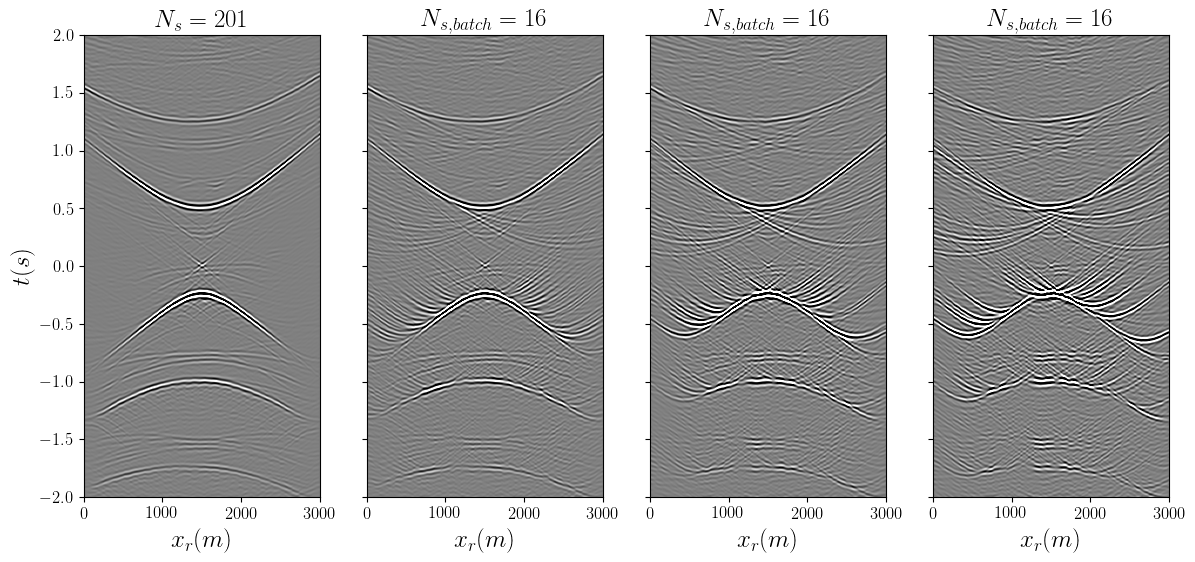

In [52]:
# gradients
f = np.load('Data/mdd_dipping_single_grad.npz')
gradfull = f['gradfull']
grad64 = f['grad64']
grad32 = f['grad32']
grad16 = f['grad16']
t = f['t']

clip=0.2
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(14, 6))
axs[0].imshow(np.fft.fftshift(gradfull, axes=0), cmap='gray', 
              vmin=-clip*np.abs(gradfull).max(), vmax=clip*np.abs(gradfull).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], -t[-1]/2, t[-1]/2))
axs[0].set_title(r'$N_s=201$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[1].imshow(np.fft.fftshift(grad64, axes=0), cmap='gray', 
              vmin=-clip*np.abs(gradfull).max(), vmax=clip*np.abs(gradfull).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], -t[-1]/2, t[-1]/2))
axs[1].set_title(r'$N_{s,batch}=16$')
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[2].imshow(np.fft.fftshift(grad32, axes=0), cmap='gray', 
              vmin=-clip*np.abs(gradfull).max(), vmax=clip*np.abs(gradfull).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], -t[-1]/2, t[-1]/2))
axs[2].set_title(r'$N_{s,batch}=16$')
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[3].imshow(np.fft.fftshift(grad16, axes=0), cmap='gray', 
              vmin=-clip*np.abs(gradfull).max(), vmax=clip*np.abs(gradfull).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], -t[-1]/2, t[-1]/2))
axs[3].set_xlabel(r'$x_r(m)$')
axs[3].set_title(r'$N_{s,batch}=16$')
axs[3].axis('tight')
axs[3].set_ylim(-2, 2)
plt.savefig('Figs/Paper/OBCdipping_data.eps', dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


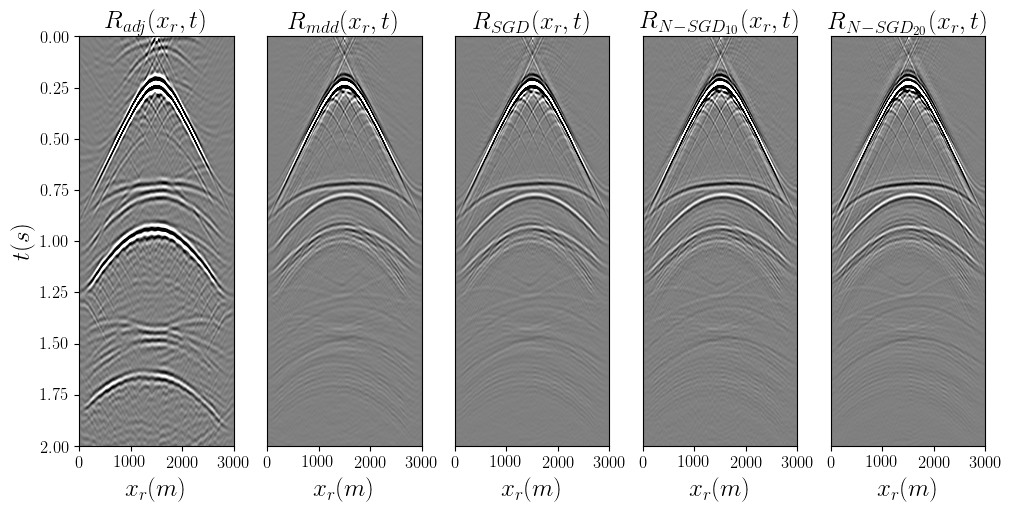

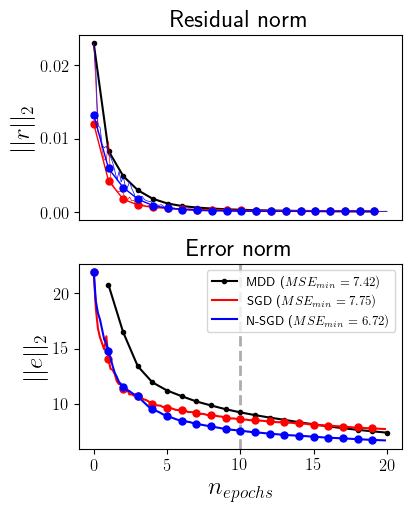

In [5]:
colors = ('r', 'b', 'g')

ivs = r_obc.shape[1]//2
niter = 20
niter1 = 10
nepochs = niter
batch_size = 32
no_of_batches = int(np.ceil(s_obc.shape[1]/batch_size))

#f = np.load('Data/mdd_dipping_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, ivs))
#f1 = np.load('Data/mdd_dipping_multi_iter%d_batch%d_ivs%d.npz' % (niter1, batch_size, ivs))
f = np.load('Data/mdd_dipping_single_iter%d_batch%d.npz' % (niter, batch_size))
f1 = np.load('Data/mdd_dipping_single_iter%d_batch%d.npz' % (niter1, batch_size))

t = f['t']
Radj = f1['Radj']
Rinv = f1['Rinv']
Rsgd = f1['Rsgd']
Rnsgd = f1['Rnsgd']
Rnsgd20 = f['Rnsgd']
resmdd = f['resmdd']
ressgd = f['ressgd']
resnsgd = f['resnsgd_lrexp']
avgressgd = f['avgressgd']
avgresnsgd = f['avgresnsgd_lrexp']
errmdd = f['errmdd']
errsgd = f['errsgd']
errnsgd = f['errnsgd']

clip = .1
fig, axs = plt.subplots(1, 5, figsize=(10, 5), constrained_layout=True)
axs[0].imshow(Radj, cmap='gray', 
              vmin=-clip*np.abs(Radj).max(), vmax=clip*np.abs(Radj).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[0].set_title(r'$R_{adj}(x_r, t)$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[0].set_ylim(2., 0)
axs[1].imshow(Rinv, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[1].set_title(r'$R_{mdd}(x_r, t)$')
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_ylim(2., 0)
axs[2].imshow(Rsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[2].set_title(r'$R_{SGD}(x_r, t)$')
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[2].set_ylim(2., 0)
axs[3].imshow(Rnsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[3].set_title(r'$R_{N-SGD_{10}}(x_r, t)$')
axs[3].set_xlabel(r'$x_r(m)$')
axs[3].axis('tight')
axs[3].set_yticks([])
axs[3].set_yticklabels([])
axs[3].set_ylim(2., 0)
axs[4].imshow(Rnsgd20, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_obc[0, 0], r_obc[0,-1], t[-1], t[0]))
axs[4].set_title(r'$R_{N-SGD_{20}}(x_r, t)$')
axs[4].set_xlabel(r'$x_r(m)$')
axs[4].axis('tight')
axs[4].set_yticks([])
axs[4].set_yticklabels([])
axs[4].set_ylim(2., 0)
plt.savefig('Figs/Paper/OBCdipping_inversion.eps', dpi=150, bbox_inches='tight')

fig, axs = plt.subplots(2, 1, figsize=(4, 5), constrained_layout=True)
axs[0].plot(np.arange(nepochs), resmdd, '.-k', label="MDD")
for loss, avg, name, color in zip([ressgd, resnsgd],[avgressgd, avgresnsgd], ['SGD', 'N-SGD'], colors):
    axs[0].plot((np.arange(0, no_of_batches*nepochs, no_of_batches))/no_of_batches, avg, 
                '.-%s' % color, ms=10, linewidth = 1)
    axs[0].plot(np.arange(len(loss))/no_of_batches , loss, '%s' % color, label = loss, lw=0.5)
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].set_ylabel(r'$||r||_2$')
axs[0].set_title("Residual norm")
axs[1].axvline(10, linestyle='--', color='#adadad', linewidth=2)
axs[1].plot(np.arange(nepochs)+1, errmdd, '.-k', label=r"MDD ($MSE_{min}=%.2f)$" % np.array(errmdd[:nepochs]).min())
for enorm, name, color in zip([errsgd, errnsgd], ['SGD', 'N-SGD'], colors):
    axs[1].plot(np.arange(len(enorm))/no_of_batches, enorm, 
                '%s' % color, ms=10, label=r"%s ($MSE_{min}=%.2f)$" % (name, np.array(enorm).min()))
    axs[1].plot((np.arange(len(enorm))/no_of_batches)[::no_of_batches], enorm[::no_of_batches],
                '.%s' % color, ms=10, linewidth = 2)
axs[1].set_xlabel(r'$n_{epochs}$')
axs[1].set_ylabel(r'$||e||_2$')
axs[1].set_title("Error norm")
axs[1].legend(fontsize=9, loc='upper right');
plt.savefig('Figs/Paper/OBCdipping_inversion_norms.eps', dpi=150, bbox_inches='tight')

## Example 2: Salt

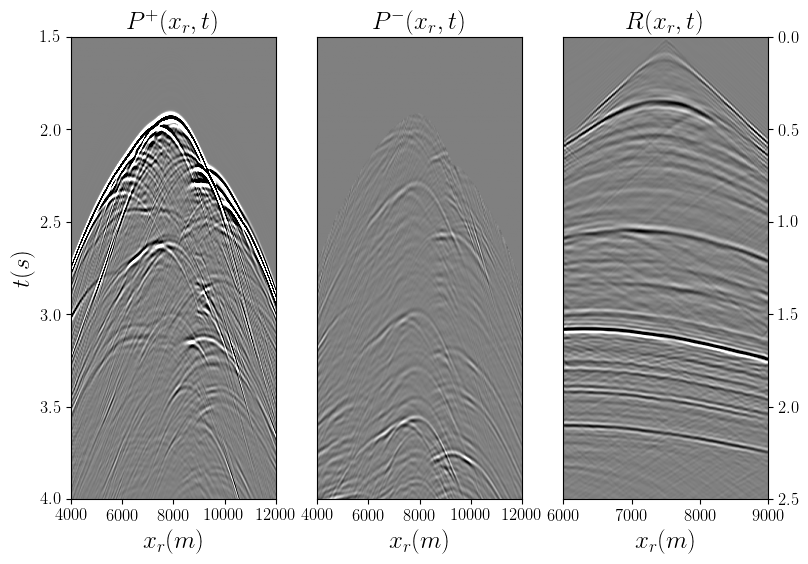

In [6]:
f = np.load('Data/mdd_salt_data.npz')

# Data
pup = f['pup']
pdown = f['pdown']
R = f['Rfilt']
t = f['t']

clip = 0.03
clipR = 0.4
fig, axs = plt.subplots(1, 3, figsize=(9, 6))
axs[0].imshow(pdown, cmap='gray', 
              vmin=-clip*np.abs(pdown).max(), vmax=clip*np.abs(pdown).max(),
              extent = (s_salt[0], s_salt[-1], t[-1], t[0]))
axs[0].set_title(r'$P^+(x_r, t)$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[0].set_ylim(4., 1.5)
axs[1].imshow(pup, cmap='gray', 
              vmin=-clip*np.abs(pdown).max(), vmax=clip*np.abs(pdown).max(),
              extent = (s_salt[0], s_salt[-1], t[-1], t[0]))
axs[1].set_title(r'$P^-(x_r, t)$')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[1].set_ylim(4., 1.5)
axs[2].imshow(R, cmap='gray', 
              vmin=-clipR*np.abs(R).max(), vmax=clipR*np.abs(R).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[2].set_title(r'$R(x_r, t)$')
axs[2].yaxis.tick_right()
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[2].set_ylim(2.5, 0)
#plt.tight_layout()
plt.savefig('Figs/Paper/Salt_data.eps', dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


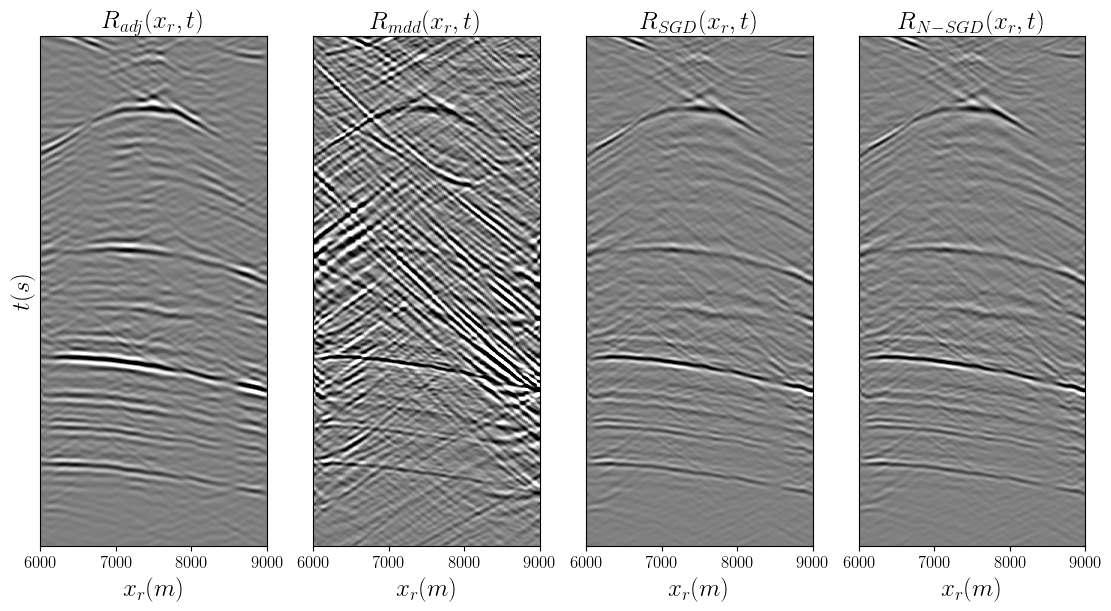

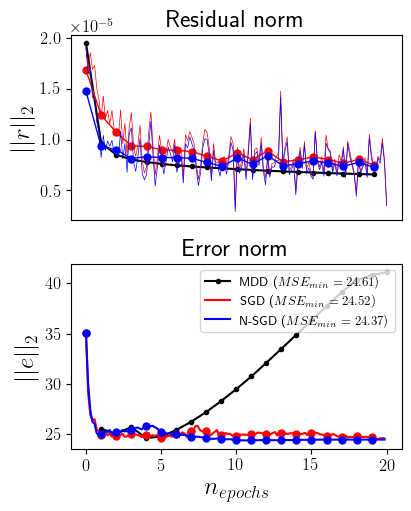

In [53]:
# 1 point

colors = ('r', 'b', 'g')

ivs = 75
niter = 20
niter1 = 10
nepochs = niter
batch_size = 32
no_of_batches = int(np.ceil(s_obc.shape[1]/batch_size))

f = np.load('Data/mdd_salt_single_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, ivs))

t = f['t']
Radj = f['Radj']
Rinv = f['Rinv']
Rsgd = f['Rsgd']
Rnsgd = f['Rnsgd_lrexp']
resmdd = f['resmdd']
ressgd = f['ressgd']
resnsgd = f['resnsgd_lrexp']
avgressgd = f['avgressgd']
avgresnsgd = f['avgresnsgd_lrexp']
errmdd = f['errmdd']
errsgd = f['errsgd']
errnsgd = f['errnsgd_lrexp']

clipadj = .4
clip = .2
fig, axs = plt.subplots(1, 4, figsize=(11, 6), sharey=True, constrained_layout=True)
axs[0].imshow(Radj, cmap='gray', 
              vmin=-clipadj*np.abs(Radj).max(), vmax=clipadj*np.abs(Radj).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[0].set_title(r'$R_{adj}(x_r, t)$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[1].imshow(Rinv, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[1].set_title(r'$R_{mdd}(x_r, t)$')
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[2].imshow(Rsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[2].set_title(r'$R_{SGD}(x_r, t)$')
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[3].imshow(Rnsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[3].set_title(r'$R_{N-SGD}(x_r, t)$')
axs[3].set_xlabel(r'$x_r(m)$')
axs[3].axis('tight')
axs[3].set_yticks([])
axs[3].set_yticklabels([])
axs[3].set_ylim(2.5, 0)
plt.savefig('Figs/Paper/Salt_inversion_single.eps', dpi=150, bbox_inches='tight')

fig, axs = plt.subplots(2, 1, figsize=(4, 5), constrained_layout=True)
axs[0].plot(np.arange(nepochs), resmdd, '.-k', label="MDD")
for loss, avg, name, color in zip([ressgd, resnsgd],[avgressgd, avgresnsgd], ['SGD', 'N-SGD'], colors):
    axs[0].plot((np.arange(0, no_of_batches*nepochs, no_of_batches))/no_of_batches, avg, 
                '.-%s' % color, ms=10, linewidth = 1)
    axs[0].plot(np.arange(len(loss))/no_of_batches , loss, '%s' % color, label = loss, lw=0.5)
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].set_ylabel(r'$||r||_2$')
axs[0].set_title("Residual norm")

axs[1].plot(np.arange(nepochs)+1, errmdd, '.-k', label=r"MDD ($MSE_{min}=%.2f)$" % np.array(errmdd[:nepochs]).min())
for enorm, name, color in zip([errsgd, errnsgd], ['SGD', 'N-SGD'], colors):
    axs[1].plot(np.arange(len(enorm))/no_of_batches, enorm, 
                '%s' % color, ms=10, label=r"%s ($MSE_{min}=%.2f)$" % (name, np.array(enorm).min()))
    axs[1].plot((np.arange(len(enorm))/no_of_batches)[::no_of_batches], enorm[::no_of_batches],
                '.%s' % color, ms=10, linewidth = 2)
axs[1].set_xlabel(r'$n_{epochs}$')
axs[1].set_ylabel(r'$||e||_2$')
axs[1].set_title("Error norm")
axs[1].legend(fontsize=9, loc='upper right');
#fig.subplots_adjust(wspace=0.5, hspace=0.2)
#fig.tight_layout(pad=-0.6)
plt.savefig('Figs/Paper/Salt_inversion_single_norms.eps', dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


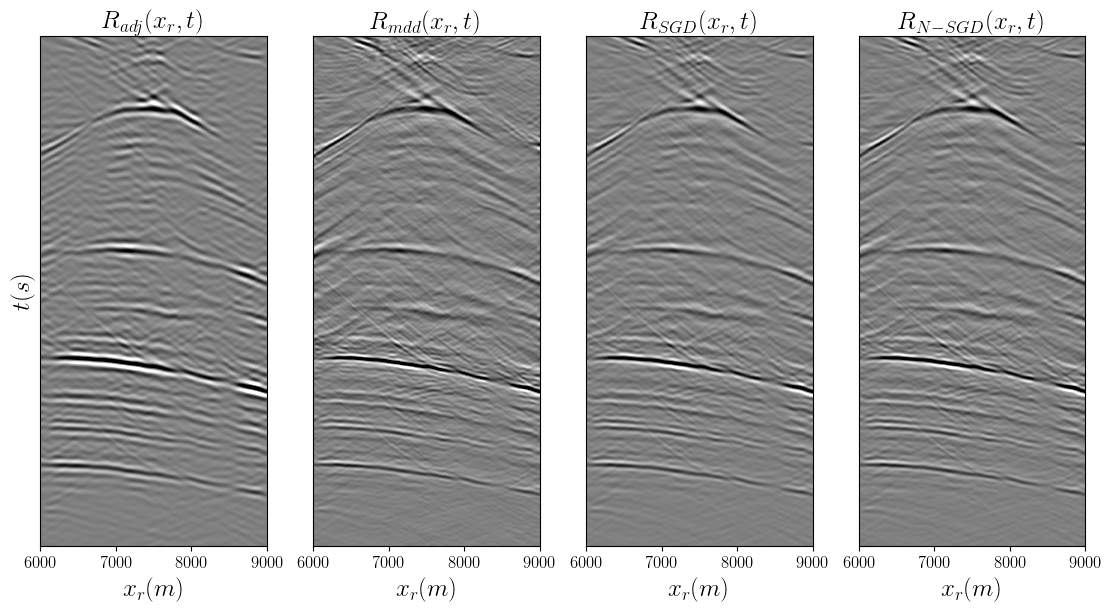

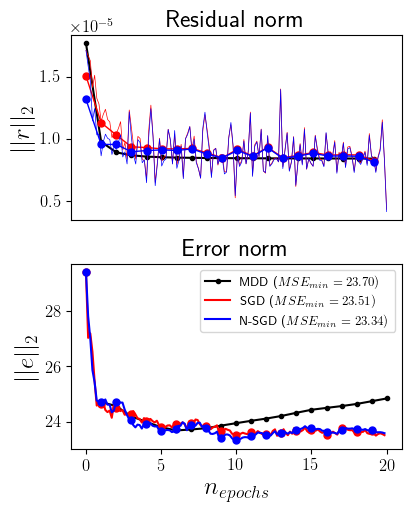

In [54]:
# N points
colors = ('r', 'b', 'g')

ivs = 75
niter = 20
niter1 = 10
nepochs = niter
batch_size = 32
no_of_batches = int(np.ceil(s_obc.shape[1]/batch_size))

f = np.load('Data/mdd_salt_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, ivs))

t = f['t']
Radj = f['Radj']
Rinv = f['Rinv']
Rsgd = f['Rsgd']
Rnsgd = f['Rnsgd_lrexp']
resmdd = f['resmdd']
ressgd = f['ressgd']
resnsgd = f['resnsgd_lrexp']
avgressgd = f['avgressgd']
avgresnsgd = f['avgresnsgd_lrexp']
errmdd = f['errmdd']
errsgd = f['errsgd']
errnsgd = f['errnsgd_lrexp']

clipadj = .4
clip = .4
fig, axs = plt.subplots(1, 4, figsize=(11, 6), sharey=True, constrained_layout=True)
axs[0].imshow(Radj, cmap='gray', 
              vmin=-clipadj*np.abs(Radj).max(), vmax=clipadj*np.abs(Radj).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[0].set_title(r'$R_{adj}(x_r, t)$')
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[1].imshow(Rinv, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[1].set_title(r'$R_{mdd}(x_r, t)$')
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[2].imshow(Rsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[2].set_title(r'$R_{SGD}(x_r, t)$')
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[3].imshow(Rnsgd, cmap='gray', 
              vmin=-clip*np.abs(Rinv).max(), vmax=clip*np.abs(Rinv).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[3].set_title(r'$R_{N-SGD}(x_r, t)$')
axs[3].set_xlabel(r'$x_r(m)$')
axs[3].axis('tight')
axs[3].set_yticks([])
axs[3].set_yticklabels([])
axs[3].set_ylim(2.5, 0)
plt.savefig('Figs/Paper/Salt_inversion_multi.eps', dpi=150, bbox_inches='tight')

fig, axs = plt.subplots(2, 1, figsize=(4, 5), constrained_layout=True)
axs[0].plot(np.arange(nepochs), resmdd, '.-k', label="MDD")
for loss, avg, name, color in zip([ressgd, resnsgd],[avgressgd, avgresnsgd], ['SGD', 'N-SGD'], colors):
    axs[0].plot((np.arange(0, no_of_batches*nepochs, no_of_batches))/no_of_batches, avg, 
                '.-%s' % color, ms=10, linewidth = 1)
    axs[0].plot(np.arange(len(loss))/no_of_batches , loss, '%s' % color, label = loss, lw=0.5)
axs[0].set_xticks([])
axs[0].set_xticklabels([])
axs[0].set_ylabel(r'$||r||_2$')
axs[0].set_title("Residual norm")

axs[1].plot(np.arange(nepochs)+1, errmdd, '.-k', label=r"MDD ($MSE_{min}=%.2f)$" % np.array(errmdd[:nepochs]).min())
for enorm, name, color in zip([errsgd, errnsgd], ['SGD', 'N-SGD'], colors):
    axs[1].plot(np.arange(len(enorm))/no_of_batches, enorm, 
                '%s' % color, ms=10, label=r"%s ($MSE_{min}=%.2f)$" % (name, np.array(enorm).min()))
    axs[1].plot((np.arange(len(enorm))/no_of_batches)[::no_of_batches], enorm[::no_of_batches],
                '.%s' % color, ms=10, linewidth = 2)
axs[1].set_xlabel(r'$n_{epochs}$')
axs[1].set_ylabel(r'$||e||_2$')
axs[1].set_title("Error norm")
axs[1].legend(fontsize=9, loc='upper right');
#fig.subplots_adjust(wspace=0.5, hspace=0.2)
#fig.tight_layout(pad=-0.6)
plt.savefig('Figs/Paper/Salt_inversion_multi_norms.eps', dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


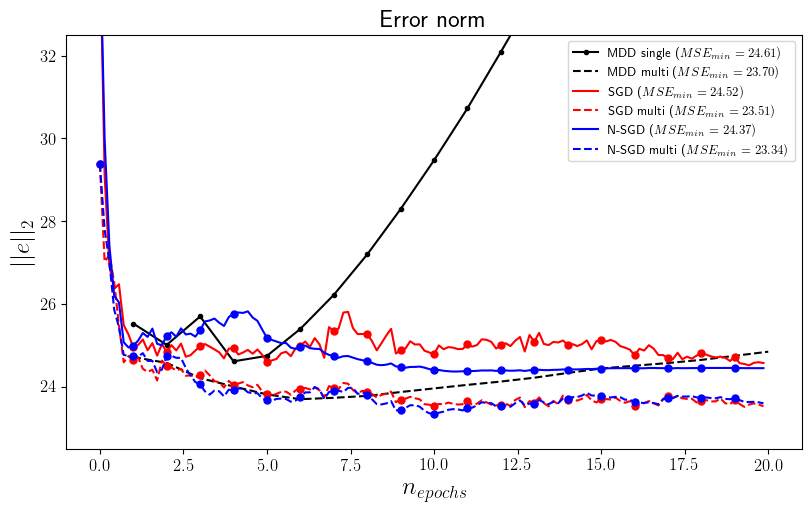

In [56]:
colors = ('r', 'b', 'g')

f = np.load('Data/mdd_salt_single_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, ivs))
errmdd = f['errmdd']
errsgd = f['errsgd']
errnsgd = f['errnsgd_lrexp']

f = np.load('Data/mdd_salt_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, ivs))
errmdd_multi = f['errmdd']
errsgd_multi = f['errsgd']
errnsgd_multi = f['errnsgd_lrexp']

fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
ax.plot(np.arange(nepochs)+1, errmdd, '.-k', 
        label=r"MDD single ($MSE_{min}=%.2f)$" % np.array(errmdd[:nepochs]).min())
ax.plot(np.arange(nepochs)+1, errmdd_multi, '--k', 
        label=r"MDD multi ($MSE_{min}=%.2f)$" % np.array(errmdd_multi[:nepochs]).min())
for enorm, enorm_multi, name, color in zip([errsgd, errnsgd], [errsgd_multi, errnsgd_multi], ['SGD', 'N-SGD'], colors):
    ax.plot(np.arange(len(enorm))/no_of_batches, enorm, 
            '%s' % color, ms=10, label=r"%s ($MSE_{min}=%.2f)$" % (name, np.array(enorm).min()))
    ax.plot((np.arange(len(enorm))/no_of_batches)[::no_of_batches], enorm[::no_of_batches],
                '.%s' % color, ms=10, linewidth = 2)
    
    ax.plot(np.arange(len(enorm))/no_of_batches, enorm_multi, 
            '--%s' % color, ms=10, label=r"%s multi ($MSE_{min}=%.2f)$" % (name, np.array(enorm_multi).min()))
    ax.plot((np.arange(len(enorm))/no_of_batches)[::no_of_batches], enorm_multi[::no_of_batches],
            '.%s' % color, ms=10, linewidth = 2)
    
#ax.set_ylim(28.5, 36)
ax.set_xlabel(r'$n_{epochs}$')
ax.set_ylabel(r'$||e||_2$')
ax.set_title("Error norm")
ax.set_ylim(22.5, 32.5)
ax.legend(fontsize=9, loc='upper right');
plt.savefig('Figs/Paper/Salt_inversion_single_multi_errnorms.eps', dpi=150, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{'MDD': 1.3035292187184588, 'SGD': 0.9779935304136779, 'N-SGD': 1.0213243795266616}


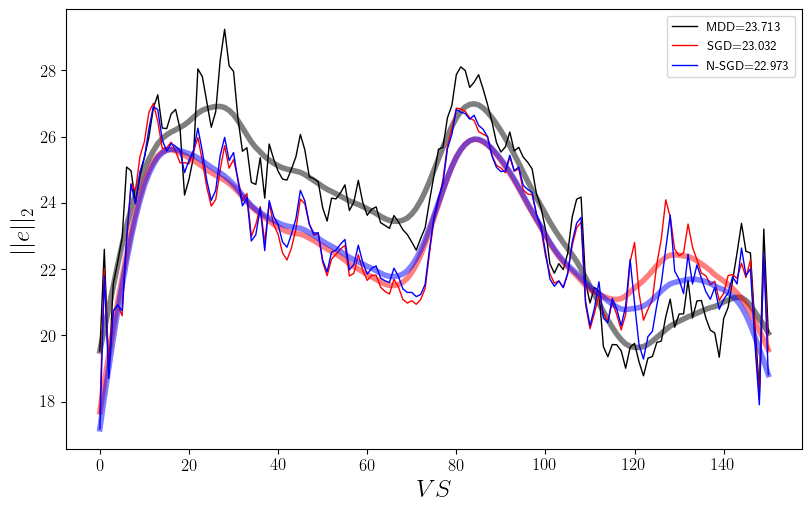

In [10]:
colors = ('k', 'r', 'b')

erronorm = {}
erronorm['MDD'] = f['errmddall']
erronorm['SGD'] = f['errsgdall']
erronorm['N-SGD'] = f['errnsgd_lrexpall']

# compute std of error
nr = len(erronorm['MDD'])
losses = list(erronorm.keys())
errstd = {}
for loss in losses:
    errstd[loss] = 0.5 * np.std(erronorm[loss])
print(errstd)

# All receivers/virtual sources
fig, ax = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
nsmooth = 11
smooth = np.ones(nsmooth) / nsmooth

twin = 0
for loss, color in zip(losses, colors):
    #ax.fill_between(np.arange(nr), filtfilt(smooth, 1, erronorm[loss])-errstd[loss], 
    #                    filtfilt(smooth, 1, erronorm[loss])+errstd[loss], 
    #                    color=color, lw=4, alpha=0.2)
    ax.plot(erronorm[loss], color, lw=1, label='%s=%.3f' % (loss, np.mean(erronorm[loss])))
    ax.plot(filtfilt(smooth, 1, erronorm[loss]), color, lw=4, alpha=0.5)
ax.set_xlabel(r'$VS$')
ax.set_ylabel(r'$||e||_2$');
ax.legend(fontsize=9, loc='upper right');
plt.savefig('Figs/Paper/Salt_inversion_multi_errallnorms.eps', dpi=150, bbox_inches='tight')

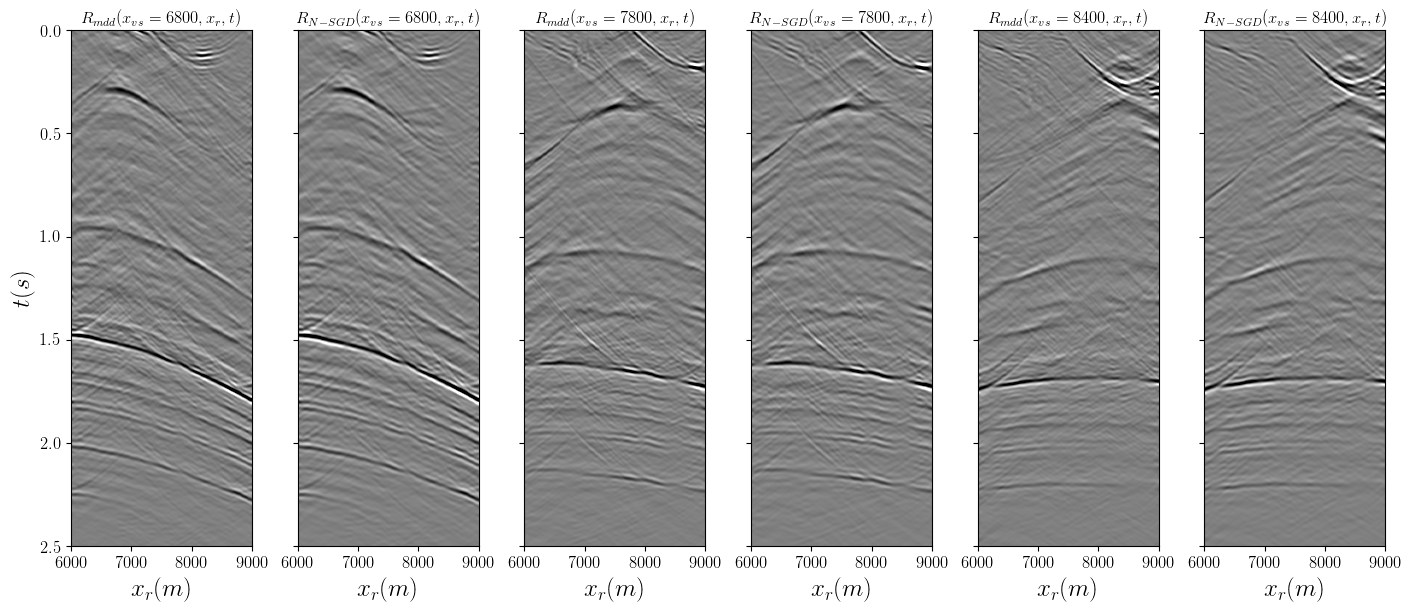

In [70]:
# N points
colors = ('r', 'b', 'g')

ivs = 75
niter = 20
nepochs = niter
batch_size = 32
no_of_batches = int(np.ceil(s_obc.shape[1]/batch_size))

f = np.load('Data/mdd_salt_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, 40))
f1 = np.load('Data/mdd_salt_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, 90))
f2 = np.load('Data/mdd_salt_multi_iter%d_batch%d_ivs%d.npz' % (niter, batch_size, 120))

t = f['t']
Rinv40 = f['Rinv']
Rnsgd40 = f['Rnsgd_lrexp']
Rinv90 = f1['Rinv']
Rnsgd90 = f1['Rnsgd_lrexp']
Rinv120 = f2['Rinv']
Rnsgd120 = f2['Rnsgd_lrexp']

clipadj = .4
clip = .4
fig, axs = plt.subplots(1, 6, figsize=(14, 6), sharey=True, constrained_layout=True)
axs[0].imshow(Rinv40, cmap='gray', 
              vmin=-clipadj*np.abs(Rinv40).max(), vmax=clipadj*np.abs(Rinv40).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[0].set_title(r'$R_{mdd}(x_{vs}=%d, x_r, t)$' % r_salt[40], fontsize=12)
axs[0].set_ylabel(r'$t(s)$')
axs[0].set_xlabel(r'$x_r(m)$')
axs[0].axis('tight')
axs[1].imshow(Rnsgd40, cmap='gray', 
              vmin=-clip*np.abs(Rnsgd40).max(), vmax=clip*np.abs(Rnsgd40).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[1].set_title(r'$R_{N-SGD}(x_{vs}=%d, x_r, t)$' % r_salt[40], fontsize=12)
axs[1].set_xlabel(r'$x_r(m)$')
axs[1].axis('tight')
axs[2].imshow(Rinv90, cmap='gray', 
              vmin=-clip*np.abs(Rinv90).max(), vmax=clip*np.abs(Rinv90).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[2].set_title(r'$R_{mdd}(x_{vs}=%d, x_r, t)$' % r_salt[90], fontsize=12)
axs[2].set_xlabel(r'$x_r(m)$')
axs[2].axis('tight')
axs[3].imshow(Rnsgd90, cmap='gray', 
              vmin=-clip*np.abs(Rnsgd90).max(), vmax=clip*np.abs(Rnsgd90).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[3].set_title(r'$R_{N-SGD}(x_{vs}=%d, x_r, t)$' % r_salt[90], fontsize=12)
axs[3].set_xlabel(r'$x_r(m)$')
axs[3].axis('tight')
axs[3].set_ylim(2.5, 0)
axs[4].imshow(Rinv120, cmap='gray', 
              vmin=-clip*np.abs(Rinv90).max(), vmax=clip*np.abs(Rinv90).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[4].set_title(r'$R_{mdd}(x_{vs}=%d, x_r, t)$' % r_salt[120], fontsize=12)
axs[4].set_xlabel(r'$x_r(m)$')
axs[4].axis('tight')
axs[5].imshow(Rnsgd120, cmap='gray', 
              vmin=-clip*np.abs(Rnsgd90).max(), vmax=clip*np.abs(Rnsgd90).max(),
              extent = (r_salt[0], r_salt[-1], t[-1], t[0]))
axs[5].set_title(r'$R_{N-SGD}(x_{vs}=%d, x_r, t)$' % r_salt[120], fontsize=12)
axs[5].set_xlabel(r'$x_r(m)$')
axs[5].axis('tight')
axs[5].set_ylim(2.5, 0)
#plt.savefig('Figs/Paper/Salt_inversion_differentivs.eps', dpi=150, bbox_inches='tight')

## Example 4: Volve real

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


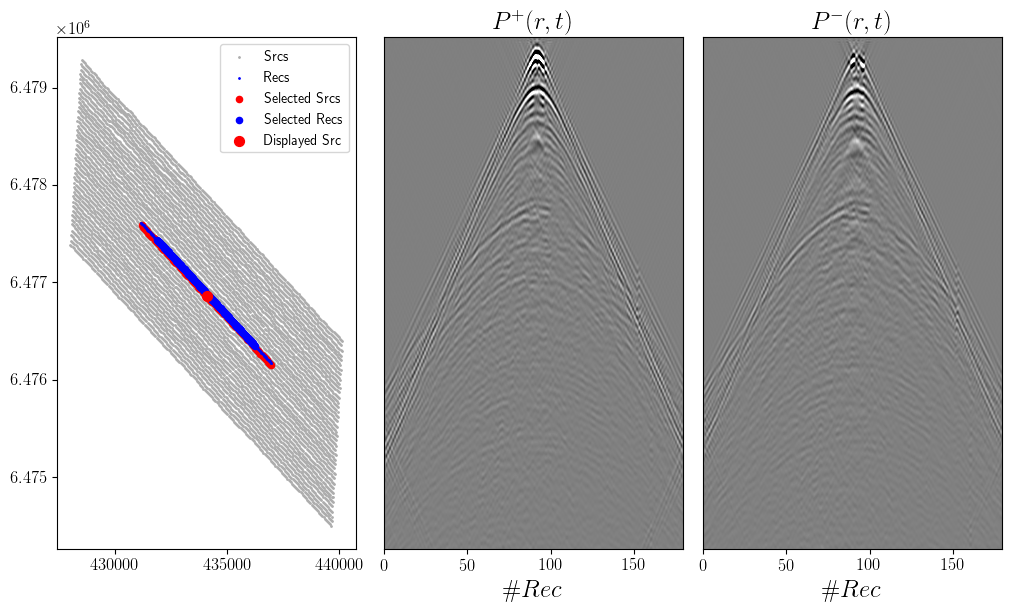

In [12]:
# Geometry
filepath = '/home/ravasim/Documents/Data/Volve/'
inputfile = os.path.join(filepath, 'ST10010_1150780_40203.sgy')

ishotc = 5520
ishotin, ishotend = ishotc-120, ishotc+120
irecin, irecend = 30, 210

sg = SegyShot(inputfile, components=['P', 'VZ', 'VX', 'VY'])
sg.interpret()
sg.selectrecs(irecin, irecend, plotflag=False)
sg.selectsrcs(ishotin, ishotend, jump=2, plotflag=False)

# Data
ishot = 60
nt, nr = 5000, len(sg.selected_rec)
pdownfile = 'Volveimaging/pdown_shot%d.bin' % ishot
pupfile = 'Volveimaging/pup_shot%d.bin' % ishot
pdown = np.fromfile(pdownfile, dtype=np.float32).reshape(nt, nr)
pup = np.fromfile(pupfile, dtype=np.float32).reshape(nt, nr)
t = np.arange(nt) * 0.002
r = np.arange(nr)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(10, 6))    
axs[0].scatter(sg.srcx, sg.srcy, c='#adadad', s=1, label='Srcs')
axs[0].scatter(sg.recx, sg.recy, color='b', s=1, label='Recs')
axs[0].scatter(sg.srcx[sg.selected_src], sg.srcy[sg.selected_src], color='r', s=20, label='Selected Srcs')
axs[0].scatter(sg.recx, sg.recy, color='b', s=1)
axs[0].scatter(sg.recx[sg.selected_rec], sg.recy[sg.selected_rec], color='b', s=20, label='Selected Recs')
axs[0].scatter(sg.srcx[sg.selected_src][ishot], sg.srcy[sg.selected_src][ishot], 
               color='r', s=50, label='Displayed Src')
axs[0].legend()
axs[1].imshow(pdown, cmap='gray', vmin=-2e6, vmax=2e6, interpolation='sinc', extent=(r[0], r[-1], t[-1], t[0]))
axs[1].set_title(r'$P^+(r,t)$')
axs[1].axis('tight')
axs[1].set_ylim(2, 0)
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_xlabel(r'$\#Rec$')
axs[2].imshow(pup, cmap='gray', vmin=-2e6, vmax=2e6, interpolation='sinc', extent=(r[0], r[-1], t[-1], t[0]))
axs[2].set_title(r'$P^-(r,t)$')
axs[2].axis('tight')
axs[2].set_ylim(2, 0)
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[2].set_xlabel(r'$\#Rec$')
plt.savefig('Figs/Paper/Volve_data.eps', dpi=300, bbox_inches='tight')

In [13]:
# Wavefields

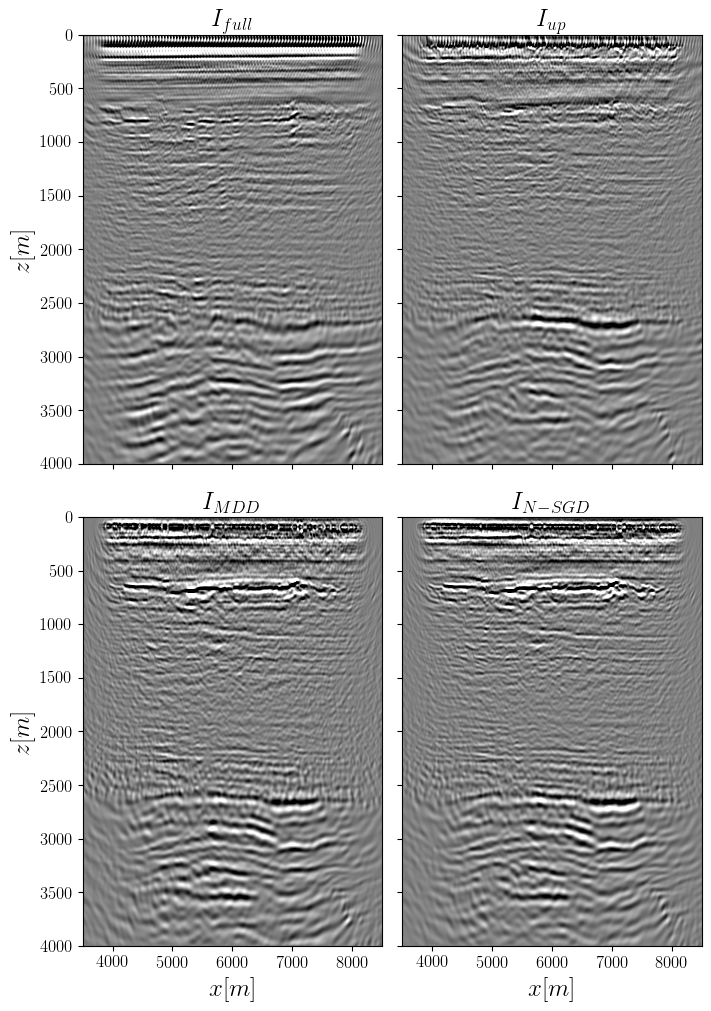

In [14]:
# Images
nx, nz = 801, 401
dx, dz = 10, 10
ox, oz = 2000, 0

x, z = np.arange(nx)*dx + ox, np.arange(nz)*dz + oz

ifile = np.load('/home/ravasim/Documents/Madagascar/RSFSRC/book/mrava/mddstoch/volve/Images/images.npz')
ifull = ifile['ifilt']
iup = ifile['iup']
imdd = ifile['imdd']
isgd = ifile['isgd']
isgdmexp = ifile['isgdmexp']

# artifact removal
nsmooth = 10
smooth=np.ones(nsmooth)/nsmooth
ifull=ifull-filtfilt(smooth,1,filtfilt(smooth,1,ifull).T).T
iup=iup-filtfilt(smooth,1,filtfilt(smooth,1,iup).T).T
imdd=imdd-filtfilt(smooth,1,filtfilt(smooth,1,imdd).T).T
isgd=isgd-filtfilt(smooth,1,filtfilt(smooth,1,isgd).T).T
isgdmexp=isgdmexp-filtfilt(smooth,1,filtfilt(smooth,1,isgdmexp).T).T
                 
clip = 2e4
gain = np.sqrt(z)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True, figsize=(7, 10))
axs = axs.flatten()

axs[0].imshow(ifull * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
#ax.plot(sg.srcx_local[ishotc-120:ishotc+120:2], sg.srcz[ishotc-120:ishotc+120:2], '*r', ms=20)
#ax.plot(sg.recx_local[sg.selected_rec], sg.recz[sg.selected_rec], '.w', ms=20)
axs[0].set_ylabel(r'$z[m]$')
axs[0].set_title(r'$I_{full}$')
axs[0].axis('tight')

axs[1].imshow(iup * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
#axs[1].plot(sg.srcx_local[ishotc-120:ishotc+120:2], sg.srcz[ishotc-120:ishotc+120:2], '*r', ms=20)
#axs[1].plot(sg.recx_local[sg.selected_rec], sg.recz[sg.selected_rec], '.w', ms=20)
axs[1].set_title(r'$I_{up}$')
axs[1].axis('tight')

clip = 5e-5
axs[2].imshow(imdd * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
#ax.plot(sg.recx_local[sg.selected_rec][::2], sg.recz[sg.selected_rec][::2], '*r', ms=20)
#ax.plot(sg.recx_local[sg.selected_rec][1::2], sg.recz[sg.selected_rec][1::2], '.w', ms=20)
axs[2].set_xlabel(r'$x[m]$')
axs[2].set_ylabel(r'$z[m]$')
axs[2].set_title(r'$I_{MDD}$')
axs[2].axis('tight')

#clip = 2e-5
#axs[3].imshow(isgd * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
#          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
#ax.plot(sg.recx_local[sg.selected_rec][::2], sg.recz[sg.selected_rec][::2], '*r', ms=20)
#ax.plot(sg.recx_local[sg.selected_rec][1::2], sg.recz[sg.selected_rec][1::2], '.w', ms=20)
#axs[3].set_title(r'I sgd')
#axs[3].axis('tight')

clip = 3e-5
axs[3].imshow(isgdmexp * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
#axs[3].plot(sg.recx_local[sg.selected_rec][::2], sg.recz[sg.selected_rec][::2], '*r', ms=20)
#axs[3].plot(sg.recx_local[sg.selected_rec][1::2], sg.recz[sg.selected_rec][1::2], '.w', ms=20)
axs[3].set_xlabel(r'$x[m]$')
axs[3].set_title(r'$I_{N-SGD}$')
axs[3].axis('tight')
axs[3].set_xlim(3500, 8500)
plt.savefig('Figs/Paper/Volve_images.eps', dpi=300, bbox_inches='tight')

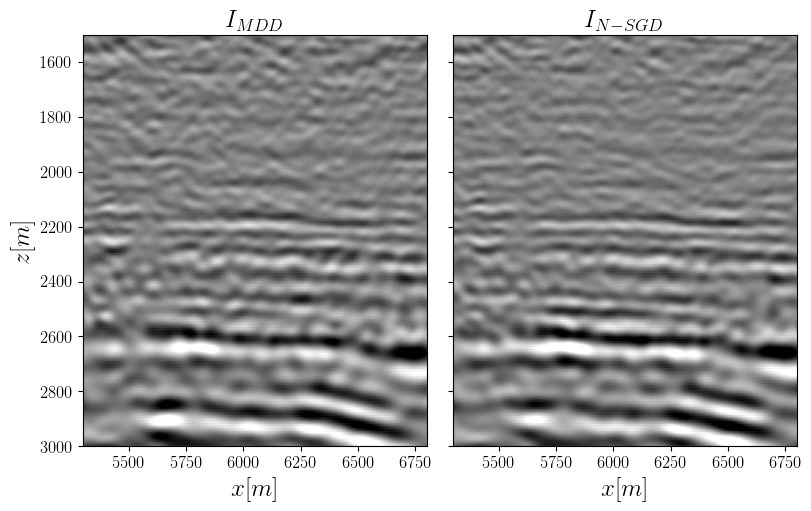

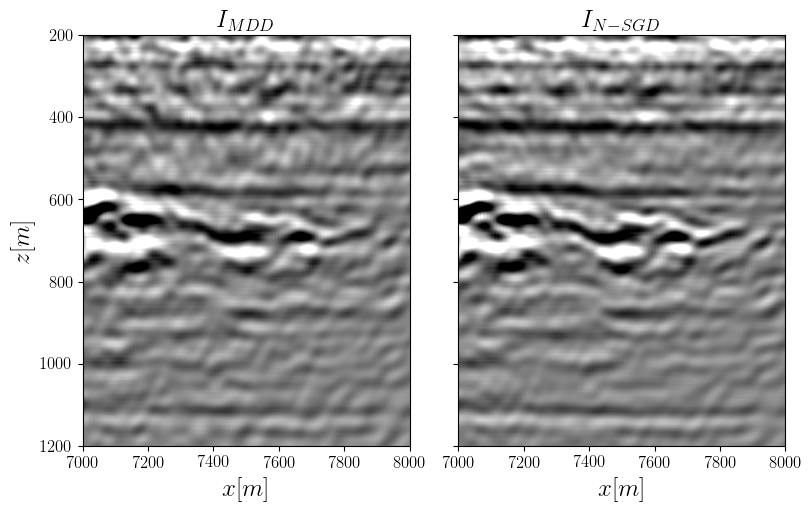

In [15]:
xlims = [(5300, 6800), (7000, 8000)]
ylims = [(3000, 1500), (1200, 200)]

for i, (xlim, ylim) in enumerate(zip(xlims, ylims)):
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True, figsize=(8, 5))
    clip = 5e-5
    axs[0].imshow(imdd * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
              interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
    axs[0].set_xlabel(r'$x[m]$')
    axs[0].set_ylabel(r'$z[m]$')
    axs[0].set_title(r'$I_{MDD}$')
    axs[0].axis('tight')

    clip = 3e-5
    axs[1].imshow(isgdmexp * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
              interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
    axs[1].set_xlabel(r'$x[m]$')
    axs[1].set_title(r'$I_{N-SGD}$')
    axs[1].axis('tight')
    axs[1].set_xlim(xlim)
    axs[1].set_ylim(ylim)
    plt.savefig('Figs/Paper/Volve_images_zoom%d.eps' % i, dpi=300, bbox_inches='tight')

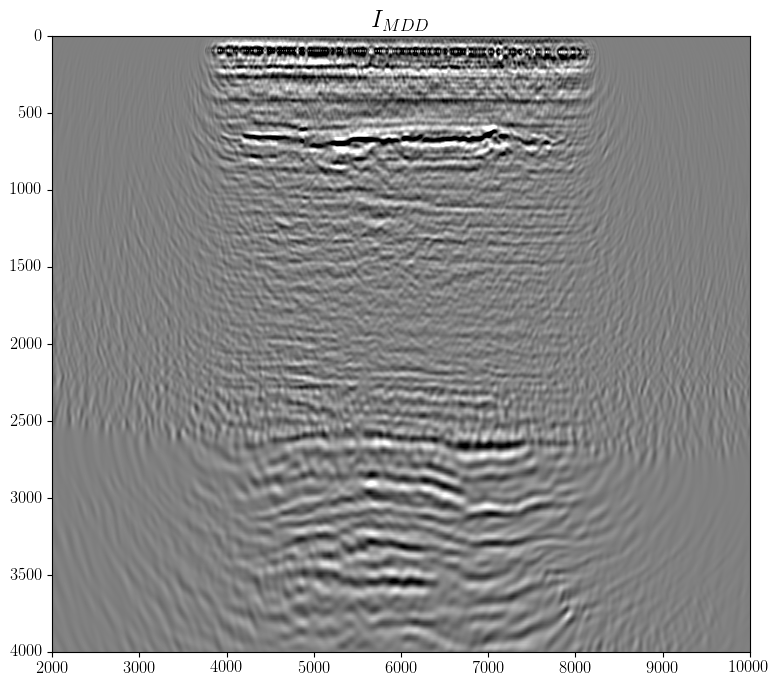

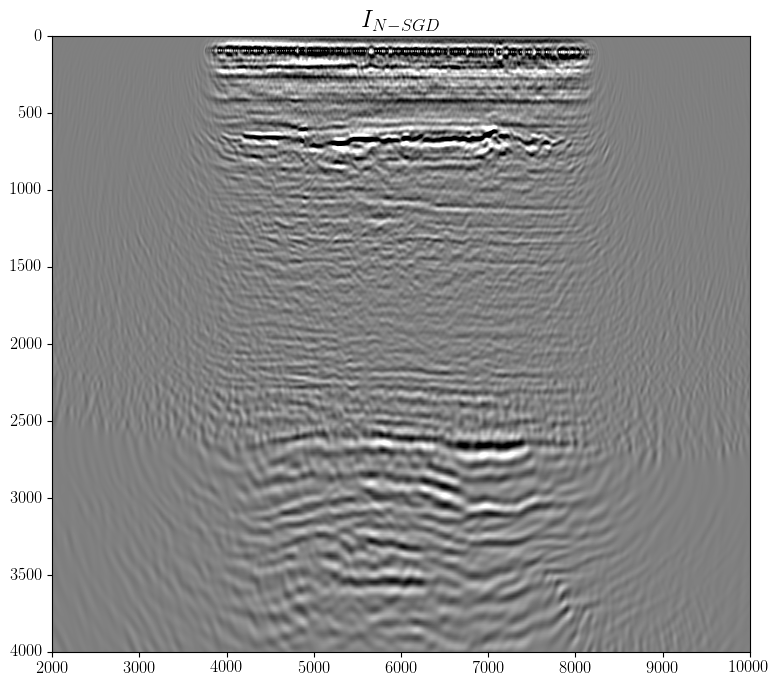

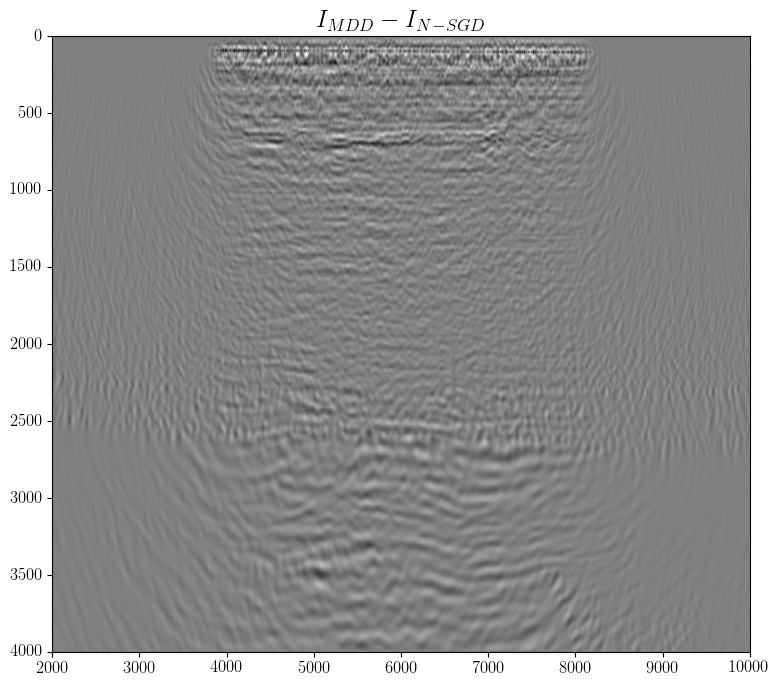

In [16]:
clip = 5e-1

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.imshow((imdd * gain[:, np.newaxis]) / np.max(imdd * gain[:, np.newaxis]),
          cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.set_title(r'$I_{MDD}$')
ax.axis('tight')

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.imshow((isgdmexp * gain[:, np.newaxis]) / np.max(isgdmexp * gain[:, np.newaxis]), 
          cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.set_title(r'$I_{N-SGD}$')
ax.axis('tight')

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.imshow((imdd * gain[:, np.newaxis]) / np.max(imdd * gain[:, np.newaxis]) -
          (isgdmexp * gain[:, np.newaxis]) / np.max(isgdmexp * gain[:, np.newaxis]), 
          cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.set_title(r'$I_{MDD}-I_{N-SGD}$')
ax.axis('tight');